In [1]:
# To support both python 2 and python 3
# 让这份笔记同步支持 python 2 和 python 3
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
#使用statsmodels便于统计分析数据
import statsmodels.api as sm
import statsmodels.formula.api as smf
#使用sklearn便于预测（机器学习）
from sklearn import linear_model
#使用patsy便于生成模型
import patsy

**4.6.1 The Stock Market Data**

以下代码对应原文中：

> library(ISLR)

> names(Smarket)

In [3]:
Smarket = pd.read_csv("data/Smarket.csv")
Smarket.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

对应 dim(Smarket)

In [4]:
Smarket.shape

(1250, 9)

对应 summary(Smarket)

In [5]:
Smarket.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


对应pairs(Smarket)

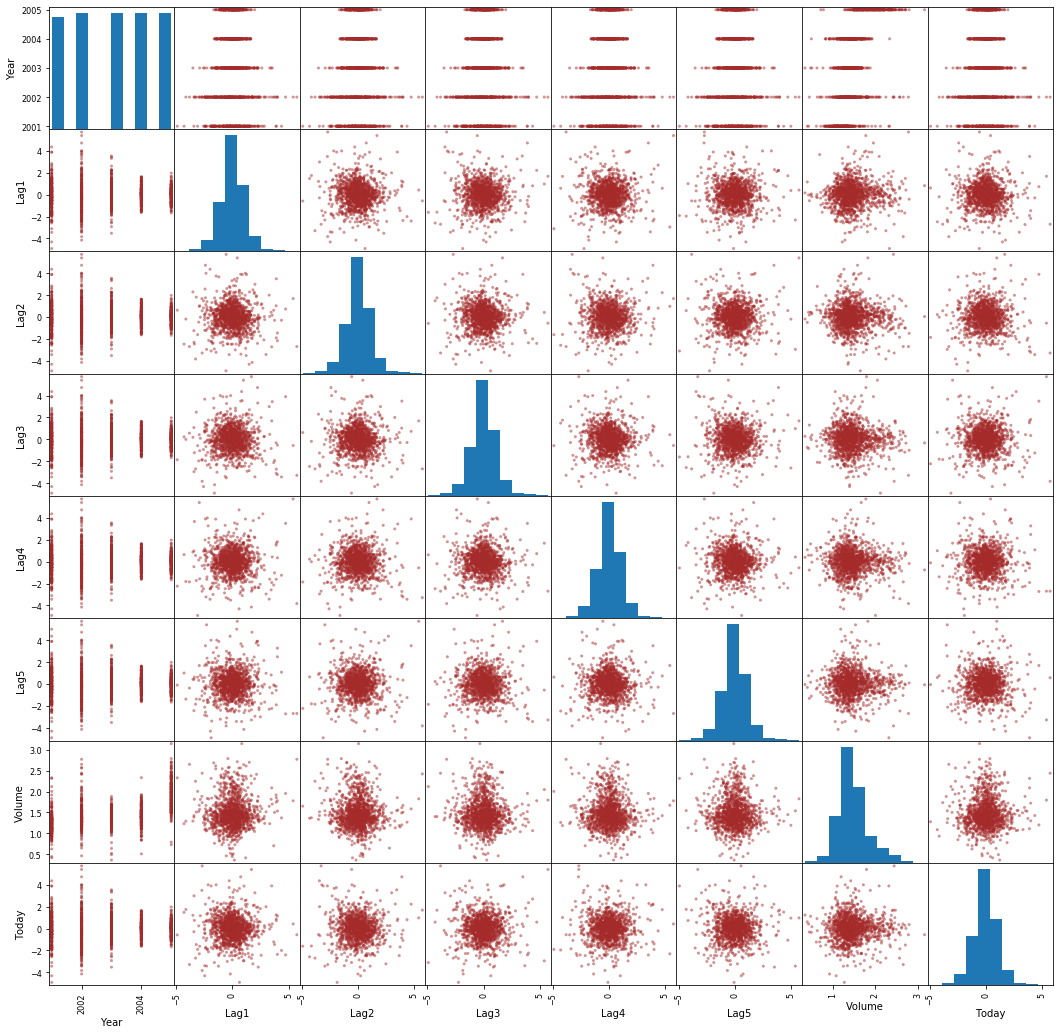

In [6]:
from pandas.plotting import scatter_matrix
scatter_matrix(Smarket, color="brown",figsize=(18, 18))
plt.grid(linestyle='')

对应cor(Smarket)（对PYTHON直接跳转了 cor(Smarket [,-9])）

In [7]:
Smarket.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


对应
> attach(Smarket) 

> plot(Volume)

In [8]:
Smarket.index

RangeIndex(start=0, stop=1250, step=1)

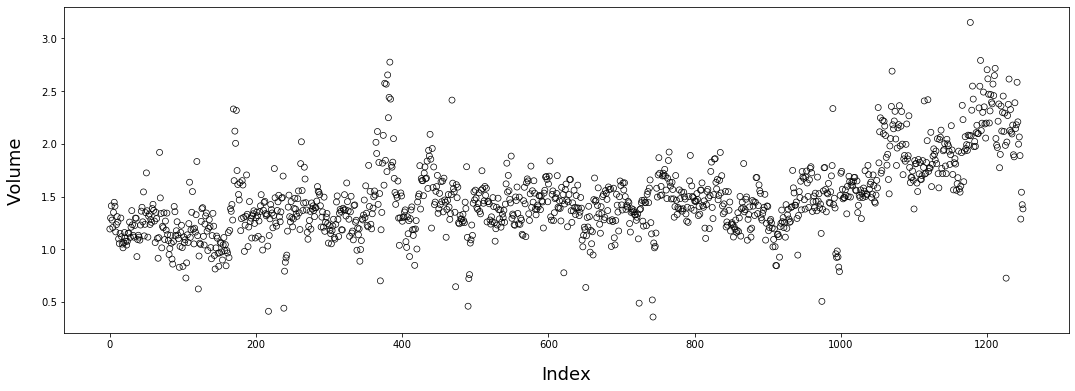

In [9]:
plt.figure(figsize = (18,6))
plt.scatter(Smarket.index,Smarket.Volume,color = '',edgecolor = 'black',linewidths = 0.7)
plt.xlabel('Index',fontsize = 18,labelpad = 16)
plt.ylabel('Volume',fontsize = 18,labelpad = 16)
plt.show()

**4.6.2 Logistic Regression**

In [10]:
Smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [11]:
#将Direction哑变量便于分析，python直接使用'Direction ~ '出现operands could not be broadcast together with shapes (1250,2) (1250,) 错误
key_title = 'Direction'
dummies = pd.get_dummies(Smarket['Direction'],prefix = key_title)
Smarket_Dummy = Smarket.join(dummies)

In [12]:
Smarket_Dummy.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Direction_Down,Direction_Up
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up,0,1
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up,0,1
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down,1,0
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up,0,1
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up,0,1


对应：
> glm.fits=glm(Direction∼Lag1+Lag2+Lag3+Lag4+Lag5+Volume ,
data=Smarket ,family=binomial )

> summary(glm.fits)

In [13]:
#statsmodels方案
glm_smf = smf.logit('Direction_Up ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume',data = Smarket_Dummy).fit()
glm_smf.summary()

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Direction_Up   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Wed, 25 Dec 2019   Pseudo R-squ.:                0.002074
Time:                        10:29:23   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
Covariance Type:            nonrobust   LLR p-value:                    0.7319
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.050     -1.457      0.145      -0.171       0.025
Lag2          -0.0423      0.050     -0.845      0.398      -0.140       0.056
Lag3           0.0111      0.050      0.222      0.824      -0.087       0.109
Lag4           0.0094      0.050      0.187      0.851      -0.089       0.107
Lag5           0.0103      0.050      0.208      0.835      -0.087       0.107
Volume         0.1354      0.158      0.855      0.392      -0.175       0.446
==============================================================================
"""

In [14]:
#使用glm()方式模式如下,结果是一样的，但后面习惯使用更简单的logit(）
#需要注意的是如果要summary()统计Deviance（two times the maximized log-likelihood; the smaller the deviance,the better the fit）只能用该方式
glm_for_show = smf.glm('Direction_Up ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume',data = Smarket_Dummy, family = sm.families.Binomial()).fit()
glm_for_show.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           Direction_Up   No. Observations:                 1250
Model:                            GLM   Df Residuals:                     1243
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -863.79
Date:                Wed, 25 Dec 2019   Deviance:                       1727.6
Time:                        10:29:23   Pearson chi2:                 1.25e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1260      0.241     -0.523      0.601      -0.598       0.346
Lag1          -0.0731      0.050     -1.457      0.145      -0.171       0.025
Lag2          -0.0423      0.050     -0.845      0.398      -0.140       0.056
Lag3           0.0111      0.050      0.222      0.824      -0.087       0.109
Lag4           0.0094      0.050      0.187      0.851      -0.089       0.107
Lag5           0.0103      0.050      0.208      0.835      -0.087       0.107
Volume         0.1354      0.158      0.855      0.392      -0.175       0.446
==============================================================================
"""

In [15]:
#对应 coef(glm.fits)
glm_smf.params

Intercept   -0.126000
Lag1        -0.073074
Lag2        -0.042301
Lag3         0.011085
Lag4         0.009359
Lag5         0.010313
Volume       0.135441
dtype: float64

以下对应
> glm.probs=predict(glm.fits,type="response ")

> glm.probs[1:10]

In [16]:
glm_smf_probs = glm_smf.predict()
glm_smf_probs[:10].round(3)

array([0.507, 0.481, 0.481, 0.515, 0.511, 0.507, 0.493, 0.509, 0.518,
       0.489])

以下对应：
> glm.pred=rep("Down",1250)

> glm.pred[glm.probs >.5]="Up"

> table(glm.pred,Direction )

In [17]:
Smarket_Dummy['Direction_Up.pred'] = (glm_smf_probs > 0.5)
value_TN = np.sum((Smarket_Dummy['Direction_Up.pred']==0)&(Smarket_Dummy['Direction_Up']==0))
value_FN = np.sum((Smarket_Dummy['Direction_Up.pred']==0)&(Smarket_Dummy['Direction_Up']==1))
value_FP = np.sum((Smarket_Dummy['Direction_Up.pred']==1)&(Smarket_Dummy['Direction_Up']==0))
value_TP = np.sum((Smarket_Dummy['Direction_Up.pred']==1)&(Smarket_Dummy['Direction_Up']==1))
glm_pred_table = pd.DataFrame([[value_TN,value_FN],[value_FP,value_TP]],
                             index = ['Down','Up'],
                             columns = [['Direction','Direction'],['Down','Up']])
glm_pred_table.columns.names = ['','glm.pred']
glm_pred_table                               

Direction     
glm.pred      Down   Up
Down           145  141
Up             457  507

In [18]:
# mean(glm.pred==Direction )
(Smarket_Dummy['Direction_Up.pred'] == Smarket_Dummy['Direction_Up']).mean()

0.5216

In [19]:
#直接利用discrete_model.LogitResults.pred_table实现比较简单
import statsmodels.discrete as sm_dis
sm_dis.discrete_model.LogitResults.pred_table(glm_smf,threshold=0.5)

array([[145., 457.],
       [141., 507.]])

In [20]:
#也可以直接使用glm_smf.pred_table(threshold=0.5)
glm_smf.pred_table()

array([[145., 457.],
       [141., 507.]])

In [21]:
#注意与R互倒
glm_pred_table = pd.DataFrame(glm_smf.pred_table().T,
                             index = ['Down','Up'],
                             columns = [['Direction','Direction'],['Down','Up']])
glm_pred_table.columns.names = ['','glm.pred']
glm_pred_table                

Direction       
glm.pred      Down     Up
Down         145.0  141.0
Up           457.0  507.0

> train=(Year <2005)

> Smarket .2005= Smarket[!train ,]

> dim(Smarket .2005)

> Direction .2005= Direction [!train]

In [22]:
Smarket_Dummy_Train = Smarket_Dummy[Smarket_Dummy['Year'] < 2005].drop('Direction_Up.pred',axis = 1)
Smarket_Dummy_2005 = Smarket_Dummy[Smarket_Dummy['Year'] >= 2005].drop('Direction_Up.pred',axis = 1)
Smarket_Dummy_2005.shape

(252, 11)

> glm.fits=glm(Direction∼Lag1+Lag2+Lag3+Lag4+Lag5+Volume ,
data=Smarket ,family=binomial ,subset=train)

> glm.probs=predict(glm.fits,Smarket .2005,type="response ")

In [23]:
glm_smf_train = smf.logit('Direction_Up ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume',data = Smarket_Dummy_Train).fit()
glm_smf_probs_train = glm_smf_train.predict(Smarket_Dummy_2005)
glm_smf_probs_train[:10].round(3)

Optimization terminated successfully.
         Current function value: 0.691936
         Iterations 4


998     0.528
999     0.516
1000    0.523
1001    0.514
1002    0.498
1003    0.501
1004    0.503
1005    0.510
1006    0.504
1007    0.511
dtype: float64

> glm.pred=rep("Down",252)

> glm.pred[glm.probs >.5]="Up"

> table(glm.pred,Direction .2005)

> mean(glm.pred==Direction .2005)

> mean(glm.pred!=Direction .2005)

In [24]:
Smarket_Dummy_2005['Direction_Up.pred'] = (glm_smf_probs_train > 0.5)
value_TN = np.sum((Smarket_Dummy_2005['Direction_Up.pred']==0)&(Smarket_Dummy_2005['Direction_Up']==0))
value_FN = np.sum((Smarket_Dummy_2005['Direction_Up.pred']==0)&(Smarket_Dummy_2005['Direction_Up']==1))
value_FP = np.sum((Smarket_Dummy_2005['Direction_Up.pred']==1)&(Smarket_Dummy_2005['Direction_Up']==0))
value_TP = np.sum((Smarket_Dummy_2005['Direction_Up.pred']==1)&(Smarket_Dummy_2005['Direction_Up']==1))
glm_pred_table = pd.DataFrame([[value_TN,value_FN],[value_FP,value_TP]],
                             index = ['Down','Up'],
                             columns = [['Direction','Direction'],['Down','Up']])
glm_pred_table.columns.names = ['','pred']
glm_pred_table 

Direction    
pred      Down  Up
Down        77  97
Up          34  44

In [25]:
(Smarket_Dummy_2005['Direction_Up.pred'] == Smarket_Dummy_2005['Direction_Up']).mean()

0.4801587301587302

In [26]:
(Smarket_Dummy_2005['Direction_Up.pred'] != Smarket_Dummy_2005['Direction_Up']).mean()

0.5198412698412699

> glm.fits=glm(Direction∼Lag1+Lag2,data=Smarket ,family=binomial ,
subset=train)

> glm.probs=predict(glm.fits,Smarket .2005,type="response ")

> glm.pred=rep("Down",252)

> glm.pred[glm.probs >.5]="Up"

> table(glm.pred,Direction .2005)

> mean(glm.pred==Direction .2005)


In [27]:
glm_smf_train = smf.logit('Direction_Up ~ Lag1 + Lag2',data = Smarket_Dummy_Train).fit()
glm_smf_probs_train = glm_smf_train.predict(Smarket_Dummy_2005)
glm_smf_probs_train[:10].round(3)

Optimization terminated successfully.
         Current function value: 0.692085
         Iterations 3


998     0.510
999     0.521
1000    0.533
1001    0.526
1002    0.507
1003    0.506
1004    0.505
1005    0.513
1006    0.509
1007    0.516
dtype: float64

In [28]:
Smarket_Dummy_2005['Direction_Up_2.pred'] = (glm_smf_probs_train > 0.5)
value_TN = np.sum((Smarket_Dummy_2005['Direction_Up_2.pred']==0)&(Smarket_Dummy_2005['Direction_Up']==0))
value_FN = np.sum((Smarket_Dummy_2005['Direction_Up_2.pred']==0)&(Smarket_Dummy_2005['Direction_Up']==1))
value_FP = np.sum((Smarket_Dummy_2005['Direction_Up_2.pred']==1)&(Smarket_Dummy_2005['Direction_Up']==0))
value_TP = np.sum((Smarket_Dummy_2005['Direction_Up_2.pred']==1)&(Smarket_Dummy_2005['Direction_Up']==1))
glm_pred_table = pd.DataFrame([[value_TN,value_FN],[value_FP,value_TP]],
                             index = ['Down','Up'],
                             columns = [['Direction','Direction'],['Down','Up']])
glm_pred_table.columns.names = ['','pred']
glm_pred_table 

Direction     
pred      Down   Up
Down        35   35
Up          76  106

In [29]:
(Smarket_Dummy_2005['Direction_Up_2.pred'] == Smarket_Dummy_2005['Direction_Up']).mean()

0.5595238095238095

In [30]:
value_TP/(value_TP + value_FP)

0.5824175824175825

> predict(glm.fits,newdata=data.frame(Lag1=c(1.2,1.5),
Lag2=c(1.1,-0.8) ),type="response ")

In [31]:
glm_smf_train.predict(pd.DataFrame([[1.2,1.1],[1.5,-0.8]],columns = ['Lag1','Lag2'])).round(4)

0    0.4791
1    0.4961
dtype: float64

（以下用sklearn实现一遍4.6.2）对应：
> glm.fits=glm(Direction∼Lag1+Lag2+Lag3+Lag4+Lag5+Volume ,
data=Smarket ,family=binomial )

> summary(glm.fits)

In [32]:
Smarket_Dummy.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Direction_Down,Direction_Up,Direction_Up.pred
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up,0,1,True
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up,0,1,False
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down,1,0,False
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up,0,1,True
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up,0,1,True


In [33]:
y_Direction_Up, X_all = patsy.dmatrices('Direction_Up ~0 + Lag1+Lag2+Lag3+Lag4+Lag5+Volume', data = Smarket_Dummy,return_type="dataframe")

In [34]:
#使用sklearn实现
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty='none')
log_reg.fit(X_all, np.c_[y_Direction_Up].ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
#这里只给出coef(glm.fits)对应实现，其他统计对于sklearn实现较为复杂
log_reg.coef_

array([[-0.07307339, -0.04230074,  0.01108552,  0.00935968,  0.01031339,
         0.13544567]])

In [36]:
#对应glm.probs=predict(glm.fits,type="response ")  glm.probs[1:10]
glm_sk_probs = log_reg.predict_proba(X_all)
glm_sk_probs[:10,1].round(3)

array([0.507, 0.481, 0.481, 0.515, 0.511, 0.507, 0.493, 0.509, 0.518,
       0.489])

In [37]:
#对应> table(glm.pred,Direction )
from sklearn.metrics import confusion_matrix
Smarket_Dummy['Direction_Up.pred_sk'] = (glm_sk_probs[:,1] > 0.5)
confusion_matrix(Smarket_Dummy['Direction_Up'], Smarket_Dummy['Direction_Up.pred_sk'])

array([[145, 457],
       [141, 507]], dtype=int64)

In [38]:
#python生成的是[['TN','FP']['FN','TP']],与R互倒
glm_pred_table = pd.DataFrame(confusion_matrix(Smarket_Dummy['Direction_Up'], Smarket_Dummy['Direction_Up.pred_sk']).T,
                             index = ['Down','Up'],
                             columns = [['Direction','Direction'],['Down','Up']])
glm_pred_table.columns.names = ['','pred']
glm_pred_table       

Direction     
pred      Down   Up
Down       145  141
Up         457  507

In [39]:
#对应> mean(glm.pred==Direction )
(145+507)/1250

0.5216

In [40]:
log_reg.score(X_all,y_Direction_Up)

0.5216

> glm.fits=glm(Direction∼Lag1+Lag2+Lag3+Lag4+Lag5+Volume ,
data=Smarket ,family=binomial ,subset=train)

> glm.probs=predict(glm.fits,Smarket .2005,type="response ")

> glm.pred=rep("Down",252)

> glm.pred[glm.probs >.5]="Up"

> table(glm.pred,Direction .2005)

> mean(glm.pred==Direction .2005)

> mean(glm.pred!=Direction .2005)


In [41]:
y_train, X_train_all = patsy.dmatrices('Direction_Up ~ 0+Lag1+Lag2+Lag3+Lag4+Lag5+Volume', data = Smarket_Dummy_Train,return_type="dataframe")
y_test, X_test_all = patsy.dmatrices('Direction_Up ~ 0+Lag1+Lag2+Lag3+Lag4+Lag5+Volume', data = Smarket_Dummy_2005,return_type="dataframe")

In [42]:
log_reg = LogisticRegression(penalty='none')
log_reg.fit(X_train_all, np.c_[y_train].ravel())
glm_sk_probs = log_reg.predict_proba(X_test_all)

In [43]:
Smarket_Dummy_2005['Direction_Up.pred_sk'] = (glm_sk_probs[:,1] > 0.5)
confusion_matrix(Smarket_Dummy_2005['Direction_Up'], Smarket_Dummy_2005['Direction_Up.pred_sk'])

array([[77, 34],
       [97, 44]], dtype=int64)

In [44]:
#python生成的是[['TN','FP']['FN','TP']],与R互倒
glm_pred_table = pd.DataFrame(confusion_matrix(Smarket_Dummy_2005['Direction_Up'], Smarket_Dummy_2005['Direction_Up.pred_sk']).T,
                             index = ['Down','Up'],
                             columns = [['Direction','Direction'],['Down','Up']])
glm_pred_table.columns.names = ['','pred']
glm_pred_table

Direction    
pred      Down  Up
Down        77  97
Up          34  44

In [45]:
log_reg.score(X_test_all,y_test)

0.4801587301587302

> glm.fits=glm(Direction∼Lag1+Lag2,data=Smarket ,family=binomial ,
subset=train)

> glm.probs=predict(glm.fits,Smarket .2005,type="response ")

> glm.pred=rep("Down",252)

> glm.pred[glm.probs >.5]="Up"

> table(glm.pred,Direction .2005)

> mean(glm.pred==Direction .2005)


In [46]:
y_train, X_train_2 = patsy.dmatrices('Direction_Up ~0 + Lag1+Lag2', data = Smarket_Dummy_Train,return_type="dataframe")
y_test, X_test_2 = patsy.dmatrices('Direction_Up ~0 + Lag1+Lag2', data = Smarket_Dummy_2005,return_type="dataframe")

In [47]:
log_reg = LogisticRegression(penalty='none')
log_reg.fit( X_train_2, np.c_[y_train].ravel())
glm_sk_probs = log_reg.predict_proba(X_test_2)

In [48]:
Smarket_Dummy_2005['Direction_Up_2.pred_sk'] = (glm_sk_probs[:,1] > 0.5)
confusion_matrix(Smarket_Dummy_2005['Direction_Up'], Smarket_Dummy_2005['Direction_Up_2.pred_sk'])

array([[ 35,  76],
       [ 35, 106]], dtype=int64)

In [49]:
#python生成的是[['TN','FP']['FN','TP']],与R互倒
glm_pred_table = pd.DataFrame(confusion_matrix(Smarket_Dummy_2005['Direction_Up'], Smarket_Dummy_2005['Direction_Up_2.pred_sk']).T,
                             index = ['Down','Up'],
                             columns = [['Direction','Direction'],['Down','Up']])
glm_pred_table.columns.names = ['','pred']
glm_pred_table

Direction     
pred      Down   Up
Down        35   35
Up          76  106

In [50]:
log_reg.score(X_test_2,y_test)

0.5595238095238095

> predict(glm.fits,newdata=data.frame(Lag1=c(1.2,1.5),
Lag2=c(1.1,-0.8) ),type="response ")

In [51]:
log_reg.predict_proba(np.c_[[1.2,1.5],[1.1,-0.8]])[:,1].round(4)

array([0.4791, 0.4961])

**4.6.3 Linear Discriminant Analysis**

> library(MASS)

> lda.fit=lda(Direction∼Lag1+Lag2,data=Smarket ,subset=train)

> lda.fit

In [52]:
#由于statsmodels没有搜索到LDA/LQA的相关模块，直接使用sklearn实现
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_2, np.c_[y_train].ravel())

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [53]:
#对应Prior probabilities of groups
lda.priors_

array([0.49198397, 0.50801603])

In [54]:
#对应Group means
lda.means_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [55]:
#对应Coefficients of linear discriminants
lda.scalings_

array([[-0.64201904],
       [-0.51352928]])

> lda.pred=predict(lda.fit , Smarket .2005)

> names(lda.pred)

> lda.class=lda.pred$class

> table(lda.class ,Direction .2005)

> mean(lda.class==Direction .2005)

In [56]:
lda_class = lda.predict(X_test_2)
lda_posterior = lda.predict_proba(X_test_2)

In [57]:
Smarket_Dummy_2005['Direction_Up_2.pred_sk_lda'] = lda_class
confusion_matrix(Smarket_Dummy_2005['Direction_Up'], Smarket_Dummy_2005['Direction_Up_2.pred_sk_lda'])

array([[ 35,  76],
       [ 35, 106]], dtype=int64)

In [58]:
#python生成的是[['TN','FP']['FN','TP']],与R互倒
glm_pred_table = pd.DataFrame(confusion_matrix(Smarket_Dummy_2005['Direction_Up'], Smarket_Dummy_2005['Direction_Up_2.pred_sk_lda']).T,
                             index = ['Down','Up'],
                             columns = [['Direction','Direction'],['Down','Up']])
glm_pred_table.columns.names = ['','pred']
glm_pred_table

Direction     
pred      Down   Up
Down        35   35
Up          76  106

In [59]:
lda.score(X_test_2,y_test)

0.5595238095238095

In [60]:
#对应sum(lda.pred$posterior[,1]>=.5
np.sum(lda_posterior[:,0]>= 0.5)

70

In [61]:
#对应sum(lda.pred$posterior[,1]<.5
np.sum(lda_posterior[:,0]< 0.5)

182

In [62]:
# lda.pred$posterior[1:20,1]
lda_posterior[:20,0]

array([0.49017925, 0.4792185 , 0.46681848, 0.47400107, 0.49278766,
       0.49385615, 0.49510156, 0.4872861 , 0.49070135, 0.48440262,
       0.49069628, 0.51199885, 0.48951523, 0.47067612, 0.47445929,
       0.47995834, 0.49357753, 0.50308938, 0.49788061, 0.48863309])

In [63]:
#  lda.class[1:20]
lda_class[:20]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1.])

In [64]:
#sum(lda.pred$posterior[,1]>.9)
np.sum(lda_posterior[:,0]>= 0.9)

0

**4.6.4 Quadratic Discriminant Analysis**

> qda.fit=qda(Direction∼Lag1+Lag2,data=Smarket ,subset=train)

> qda.fit

In [65]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X_train_2,np.c_[y_train].ravel())

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0, store_covariance=True,
                              tol=0.0001)

In [66]:
#对应Prior probabilities of groups:
qda.priors_

array([0.49198397, 0.50801603])

In [67]:
#对应Group means:
qda.means_

array([[ 0.04279022,  0.03389409],
       [-0.03954635, -0.03132544]])

In [68]:
#qda.class=predict(qda.fit,Smarket .2005) $class
qda_class = qda.predict(X_test_2)

In [69]:
Smarket_Dummy_2005['Direction_Up_2.pred_sk_qda'] = qda_class
confusion_matrix(Smarket_Dummy_2005['Direction_Up'], Smarket_Dummy_2005['Direction_Up_2.pred_sk_qda'])

array([[ 30,  81],
       [ 20, 121]], dtype=int64)

In [70]:
#python生成的是[['TN','FP']['FN','TP']],与R互倒
glm_pred_table = pd.DataFrame(confusion_matrix(Smarket_Dummy_2005['Direction_Up'], Smarket_Dummy_2005['Direction_Up_2.pred_sk_qda']).T,
                             index = ['Down','Up'],
                             columns = [['Direction','Direction'],['Down','Up']])
glm_pred_table.columns.names = ['','pred']
glm_pred_table

Direction     
pred      Down   Up
Down        30   20
Up          81  121

In [71]:
qda.score(X_test_2,y_test)

0.5992063492063492

**4.6.5 K-Nearest Neighbors** 

> library(class)

> train.X=cbind(Lag1 ,Lag2)[train ,]

> test.X=cbind(Lag1,Lag2)[!train ,]

> train.Direction =Direction [train]

> set.seed(1)

> knn.pred=knn(train.X,test.X,train.Direction ,k=1)

> table(knn.pred,Direction .2005)

In [72]:
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_2,np.c_[y_train].ravel())
knn_pred = knn.predict(X_test_2)

In [73]:
Smarket_Dummy_2005['Direction_Up_2.pred_sk_knn1'] = knn_pred
confusion_matrix(Smarket_Dummy_2005['Direction_Up'], Smarket_Dummy_2005['Direction_Up_2.pred_sk_knn1'])

array([[43, 68],
       [58, 83]], dtype=int64)

In [74]:
knn.score(X_test_2,y_test)

0.5

> knn.pred=knn(train.X,test.X,train.Direction ,k=3)

> table(knn.pred,Direction .2005)

> mean(knn.pred==Direction .2005)

In [75]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_2,np.c_[y_train].ravel())
knn_pred = knn.predict(X_test_2)

In [76]:
#python生成的是[['TN','FP']['FN','TP']]
Smarket_Dummy_2005['Direction_Up_2.pred_sk_knn3'] = knn_pred
confusion_matrix(Smarket_Dummy_2005['Direction_Up'], Smarket_Dummy_2005['Direction_Up_2.pred_sk_knn3'])

array([[48, 63],
       [55, 86]], dtype=int64)

In [77]:
knn.score(X_test_2,y_test)

0.5317460317460317

**4.6.6 An Application to Caravan Insurance Data**

In [78]:
#dim(Caravan)
Caravan = pd.read_csv("data/Caravan.csv")
Caravan.shape

(5822, 87)

In [79]:
# summary(Purchase )
Caravan['Purchase'].value_counts()

No     5474
Yes     348
Name: Purchase, dtype: int64

In [80]:
Caravan.head()

,Unnamed: 0,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,1,33,1,3,2,8,0,5,1,3,...,0,0,0,1,0,0,0,0,0,No
1,2,37,1,2,2,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,No
2,3,37,1,2,2,8,0,4,2,4,...,0,0,0,1,0,0,0,0,0,No
3,4,9,1,3,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,No
4,5,40,1,4,2,10,1,4,1,4,...,0,0,0,1,0,0,0,0,0,No


> standardized.X=scale(Caravan [,-86])

> var(Caravan [,1])

> var(Caravan [,2])

> var(standardized.X[,1])

> var(standardized.X[,2])

In [81]:
from sklearn.preprocessing import StandardScaler
td_scaler =  StandardScaler()
X_factors = '0'
for x_factor in Caravan.columns:
    X_factors = X_factors + '+' + x_factor
y_Purchase, X_Caravan = patsy.dmatrices('Purchase ~{} - Purchase'.format(X_factors), data = Caravan,return_type="dataframe")
td_scaler.fit(X_Caravan)
X_Caravan_standardized = td_scaler.transform(X_Caravan)
print(Caravan.iloc[:,1].var())
print(Caravan.iloc[:,2].var())
print(X_Caravan_standardized[:,1].var())
print(X_Caravan_standardized[:,2].var())

165.03784739518855
0.1647077819319536
1.0000000000000937
1.000000000000044


> test=1:1000

> train.X=standardized.X[-test ,]

> test.X=standardized.X[test ,]

> train.Y=Purchase [-test]

> test.Y=Purchase [test]

> set.seed(1)

> knn.pred=knn(train.X,test.X,train.Y,k=1)

> mean(test.Y!=knn.pred)

> mean(test.Y!="No")


In [82]:
X_Caravan_standardized_train = X_Caravan_standardized[1000:]
X_Caravan_standardized_test = X_Caravan_standardized[:1000]
y_Purchase_train = y_Purchase[1000:]
y_Purchase_test = y_Purchase[:1000]
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_Caravan_standardized_train,y_Purchase_train.iloc[:,1])
knn_pred = knn.predict(X_Caravan_standardized_test)
print(1 - knn.score(X_Caravan_standardized_test,y_Purchase_test.iloc[:,1]))
print((y_Purchase_test.iloc[:,1] != 0).mean())

0.118
0.059


In [83]:
confusion_matrix(y_Purchase_test.iloc[:,1], knn_pred)

array([[873,  68],
       [ 50,   9]], dtype=int64)

In [84]:
#> table(knn.pred,test.Y)
#python生成的是[['TN','FP']['FN','TP']],与R互倒
glm_pred_table = pd.DataFrame(confusion_matrix(y_Purchase_test.iloc[:,1], knn_pred).T,
                             index = ['No','Yes'],
                             columns = [['    test.Y','    test.Y'],['No','Yes']])
glm_pred_table.columns.names = ['','knn.pred']
glm_pred_table

test.Y    
knn.pred         No Yes
No              873  50
Yes              68   9

In [85]:
9/(68+9)

0.11688311688311688

> knn.pred=knn(train.X,test.X,train.Y,k=3)

> table(knn.pred,test.Y)

In [86]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_Caravan_standardized_train,y_Purchase_train.iloc[:,1])
knn_pred = knn.predict(X_Caravan_standardized_test)
glm_pred_table = pd.DataFrame(confusion_matrix(y_Purchase_test.iloc[:,1], knn_pred).T,
                             index = ['No','Yes'],
                             columns = [['    test.Y','    test.Y'],['No','Yes']])
glm_pred_table.columns.names = ['','knn.pred']
glm_pred_table

test.Y    
knn.pred         No Yes
No              921  54
Yes              20   5

In [87]:
5/25

0.2

> knn.pred=knn(train.X,test.X,train.Y,k=5)

> table(knn.pred,test.Y)

In [88]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_Caravan_standardized_train,y_Purchase_train.iloc[:,1])
knn_pred = knn.predict(X_Caravan_standardized_test)
glm_pred_table = pd.DataFrame(confusion_matrix(y_Purchase_test.iloc[:,1], knn_pred).T,
                             index = ['No','Yes'],
                             columns = [['    test.Y','    test.Y'],['No','Yes']])
glm_pred_table.columns.names = ['','knn.pred']
glm_pred_table

test.Y    
knn.pred         No Yes
No              930  55
Yes              11   4

In [89]:
4/15

0.26666666666666666

> glm.fits=glm(Purchase∼.,data=Caravan ,family=binomial ,subset = -test)

> glm.probs=predict( ,Caravan[test ,],type="response ")

> glm.pred=rep("No",1000)

> glm.pred[glm.probs >.5]="Yes"

> table(glm.pred,test.Y)

> glm.pred=rep("No",1000)

> glm.pred[glm.probs >.25]=" Yes"

> table(glm.pred,test.Y)


In [90]:
log_reg = LogisticRegression(penalty = 'none', max_iter=1000)
log_reg.fit(X_Caravan_standardized_train,y_Purchase_train.iloc[:,1])
glm_sk_probs = log_reg.predict(X_Caravan_standardized_test)
glm_pred_table = pd.DataFrame(confusion_matrix(y_Purchase_test.iloc[:,1], glm_sk_probs).T,
                             index = ['No','Yes'],
                             columns = [['    test.Y','    test.Y'],['No','Yes']])
glm_pred_table.columns.names = ['','knn.pred']
glm_pred_table

test.Y    
knn.pred         No Yes
No              934  59
Yes               7   0

In [91]:
0/7

0.0

In [92]:
glm_sk_probs = (log_reg.predict_proba(X_Caravan_standardized_test)[:,1] > 0.25)
glm_pred_table = pd.DataFrame(confusion_matrix(y_Purchase_test.iloc[:,1], glm_sk_probs).T,
                             index = ['No','Yes'],
                             columns = [['    test.Y','    test.Y'],['No','Yes']])
glm_pred_table.columns.names = ['','knn.pred']
glm_pred_table

test.Y    
knn.pred         No Yes
No              919  48
Yes              22  11

In [93]:
11/33

0.3333333333333333